In [1]:
import numpy as np
import legume

%load_ext autoreload
%autoreload 2

from legume import PlaneWaveExp, Circle, ShapesLayer, Lattice
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


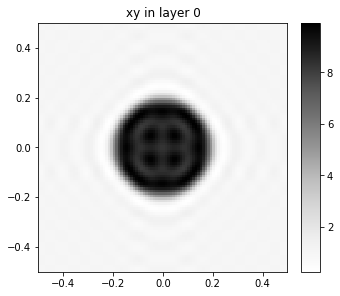

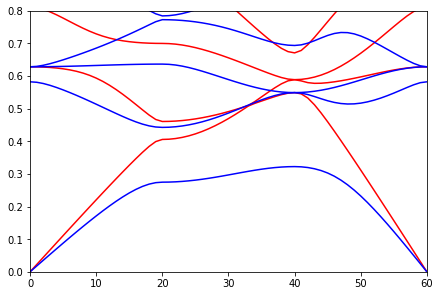

In [13]:
# Reproduce Chapter 2, Fig. 2 from Molding the Flow of Light
ra = 0.2
eps_c = 8.9

lattice1 = Lattice('square')
layer1 = ShapesLayer(lattice1, eps_b=1)
layer1.add_shape(Circle(r=ra, eps=eps_c))
path1 = layer1.lattice.bz_path(['G', 'X', 'M', 'G'], [20])
pwe_te = PlaneWaveExp(layer1, gmax=5)
pwe_tm = PlaneWaveExp(layer1, gmax=5)

pwe_te.run(kpoints=path1.kpoints, pol='te')
pwe_tm.run(kpoints=path1.kpoints, pol='tm')

legume.viz.structure_ft(pwe_te)

fig, ax = plt.subplots(1, constrained_layout=True)
plt.plot(pwe_te.freqs, 'r')
plt.plot(pwe_tm.freqs, 'b')
ax.set_ylim([0, 0.8])
ax.set_xlim([0, pwe_te.freqs.shape[0]-1])
plt.show()

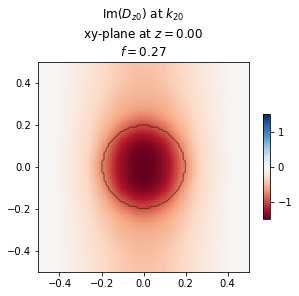

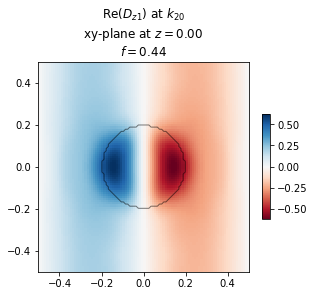

In [11]:
# Check the fields too, e.g. Fig. 3 middle row
legume.viz.field(pwe_tm, 'd', 20, 0, x=None, y=None, z=None, periodic=True,
            component='z', val='im', N1=100, N2=100, cbar=True, eps=True, 
            eps_levels=None);
legume.viz.field(pwe_tm, 'd', 20, 1, x=None, y=None, z=None, periodic=True,
            component='z', val='re', N1=100, N2=100, cbar=True, eps=True, 
            eps_levels=None);

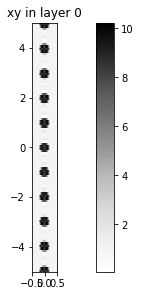

In [15]:
# Try the same crystal with a supercell

# Number of PhC periods in vertical direction
Ny = 10

# Initialize a lattice
lattice2 = Lattice([1., 0], [0, Ny])
layer2 = ShapesLayer(lattice_wg, eps_b=1)

# Add the circles to this layer 
for ih in range(Ny):
    circ = Circle(x_cent=0, y_cent = (-Ny//2 + ih), r=ra, eps=eps_c)
    layer2.add_shape(circ)
        
pwe2 = PlaneWaveExp(layer2, gmax=3)
legume.viz.structure_ft(pwe2)

## Something's wrong!
This structure should at the very least have the same band gap, but it doesn't...

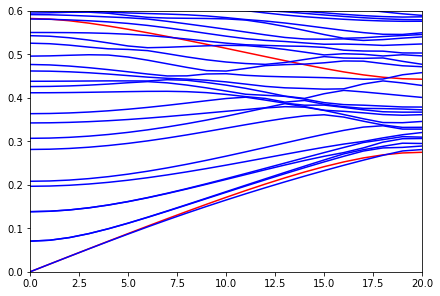

In [22]:
path2 = layer_wg.lattice.bz_path(['G', np.array([np.pi, 0])], [20])
pwe2.run(kpoints=path2.kpoints, pol='tm', numeig=100)
freqs2 = pwe2.freqs

# Run the original PWE over the same kpoints (G-X)
pwe_tm.run(kpoints=path2.kpoints, pol='tm')
freqs1 = pwe_tm.freqs

# Compare the two simulations
fig, ax = plt.subplots(1, constrained_layout=True)
plt.plot(freqs1, 'r')
plt.plot(freqs2, 'b')
ax.set_ylim([0, 0.6])
ax.set_xlim([0, pwe2.freqs.shape[0]-1])
plt.show()

## It seems that a *square* supercell works

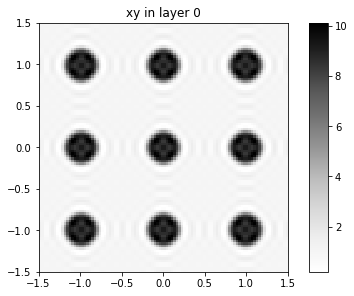

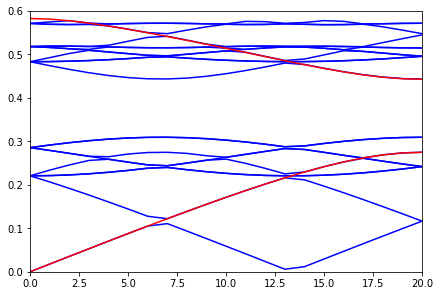

In [26]:
lattice3 = Lattice([3., 0.], [0., 3.])
layer3 = ShapesLayer(lattice3, eps_b=1)

layer3.add_shape(Circle(r=ra, eps=eps_c))
layer3.add_shape(Circle(r=ra, eps=eps_c, y_cent = 1))
layer3.add_shape(Circle(r=ra, eps=eps_c, y_cent = 1, x_cent = 1))
layer3.add_shape(Circle(r=ra, eps=eps_c, x_cent = 1))
layer3.add_shape(Circle(r=ra, eps=eps_c, x_cent = 1, y_cent = 2))
layer3.add_shape(Circle(r=ra, eps=eps_c, y_cent = 2))
layer3.add_shape(Circle(r=ra, eps=eps_c, x_cent = 2, y_cent = 2))
layer3.add_shape(Circle(r=ra, eps=eps_c, x_cent = 2, y_cent = 1))
layer3.add_shape(Circle(r=ra, eps=eps_c, x_cent = 2, y_cent = 0))

pwe3 = PlaneWaveExp(layer3, gmax=3)

pwe3.run(kpoints=path2.kpoints, pol='tm', numeig=20)
freqs3 = pwe3.freqs

legume.viz.structure_ft(pwe3)

fig, ax = plt.subplots(1, constrained_layout=True)
plt.plot(freqs3, 'b')
plt.plot(freqs1, 'r')
ax.set_ylim([0, 0.6])
ax.set_xlim([0, pwe3.freqs.shape[0]-1])
plt.show()

## But a rectangular one doesn't...
(as we saw above, but here's one more example)

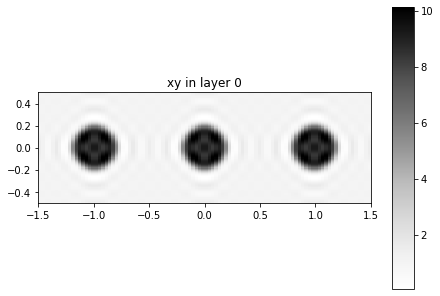

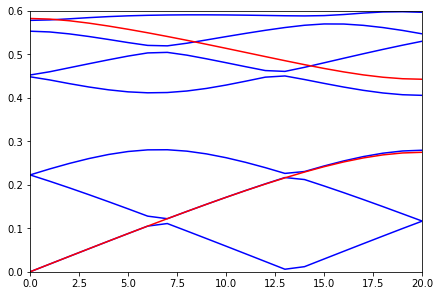

In [28]:
lattice4 = Lattice([3., 0.], [0., 1.])
layer4 = ShapesLayer(lattice4, eps_b=1)

layer4.add_shape(Circle(r=ra, eps=eps_c))
layer4.add_shape(Circle(r=ra, eps=eps_c, x_cent = 1))
layer4.add_shape(Circle(r=ra, eps=eps_c, x_cent = 2))

pwe4 = PlaneWaveExp(layer4, gmax=3)

pwe4.run(kpoints=path2.kpoints, pol='tm', numeig=20)
freqs4 = pwe4.freqs

legume.viz.structure_ft(pwe4)

fig, ax = plt.subplots(1, constrained_layout=True)
plt.plot(freqs4, 'b')
plt.plot(freqs1, 'r')
ax.set_ylim([0, 0.6])
ax.set_xlim([0, pwe4.freqs.shape[0]-1])
plt.show()

## More bands enter the band gap if you increase the number of elementary cells...